In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from fuzzywuzzy import process
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import sys
!{sys.executable} -m pip install fuzzywuzzy python-Levenshtein

In [6]:
df = pd.read_csv("cleaned_bank_data.csv")
df

,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager,Income_Status,AgeGroup,interestlevel,creditlevel
0,CUST00001,Ivan aWrrior,35,Other,Self-employed,904251,GIRIDIH,Karnataka,Home Loan,4292053,...,Bangalore branch,330987,12.53,Completed,4292053,Ayesha Bhattacharyya,high,mid-age,medium_interest,high_credit
1,CUST00002,shamik bhardwaj,70,Female,Salaried,2176409,Delhi,Karnataka,Education Loan,739452,...,Mumbai Branch,111656,12.37,Pending,739452,Adah Sha,verhigh,old-age,medium_interest,high_credit
2,CUST00003,uPrab Samra,36,Male,Student,418339,Raichur,Maharashtra,Car Loan,802308,...,Bangalore branch,282128,12.62,Completed,802308,Indrajit Batra,median,mid-age,medium_interest,low_credit
3,CUST00004,Samar Balay,42,Female,Self-employed,1249905,TIRUPPUR,Karnataka,Gold Loan,234488,...,Delhi Branch,19956,12.15,Pending,234488,Jayan Kuruvilla,high,mid-age,medium_interest,low_credit
4,CUST00005,Madhup Walla,53,Other,Unemployed,1081891,Hazaribagh,West Bengal,Education Loan,509615,...,Mumbai Branch,124663,8.52,Pending,509615,Dhanush Raju,high,adult,low_interest,medium_credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,CUST230480,Indrajti Acharya,68,Male,Salaried,2141385,Bhopal,Tamil Nadu,Car Loan,1023340,...,Bangalore branch,154080,12.97,Pending,1023340,Ana yShah,verhigh,old-age,medium_interest,high_credit
230480,CUST230481,Onkar Vala,59,Female,Retired,1619705,Mysore,Tamil Nadu,Personal Loan,636396,...,Kolkata Branch,480904,14.85,Pending,636396,Hee rBadal,verhigh,adult,high_interest,low_credit
230481,CUST230482,Kanav Sahni,28,Female,Salaried,2207685,Dugr,Maharashtra,Personal Loan,540131,...,Delhi Branch,116009,9.60,Completed,540131,Hridaan Ganesh,verhigh,young,low_interest,medium_credit
230482,CUST230483,Manikya Handa,62,Other,Salaried,1593678,Dindiugl,Karnataka,Home Loan,3241096,...,Mumbai Branch,249823,14.40,Completed,3241096,Tejas Dayal,verhigh,old-age,high_interest,low_credit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230484 entries, 0 to 230483
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_ID            230484 non-null  object 
 1   Customer_Name          230484 non-null  object 
 2   Age                    230484 non-null  int64  
 3   Gender                 230484 non-null  object 
 4   Occupation             230484 non-null  object 
 5   Annual_Income          230484 non-null  int64  
 6   City                   230484 non-null  object 
 7   State                  230484 non-null  object 
 8   Loan_Type              230484 non-null  object 
 9   Loan_Amount            230484 non-null  int64  
 10  Loan_Status            230484 non-null  object 
 11  Credit_Score           230484 non-null  int64  
 12  EMI_Amount             230484 non-null  float64
 13  Loan_Term              230484 non-null  int64  
 14  Loan_Approval_Date     230484 non-nu

In [8]:
df.dtypes

Customer_ID               object
Customer_Name             object
Age                        int64
Gender                    object
Occupation                object
Annual_Income              int64
City                      object
State                     object
Loan_Type                 object
Loan_Amount                int64
Loan_Status               object
Credit_Score               int64
EMI_Amount               float64
Loan_Term                  int64
Loan_Approval_Date        object
Mobile_Number             object
Bank_Branch               object
Account_Balance            int64
Interest_Rate            float64
Loan_Repayment_Status     object
Disbursed_Amount           int64
Branch_Manager            object
Income_Status             object
AgeGroup                  object
interestlevel             object
creditlevel               object
dtype: object

In [9]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [10]:
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

In [11]:
df['EMI_Amount'] = pd.to_numeric(df['EMI_Amount'], errors='coerce')

In [12]:
df.dtypes

Customer_ID               object
Customer_Name             object
Age                        int64
Gender                    object
Occupation                object
Annual_Income              int64
City                      object
State                     object
Loan_Type                 object
Loan_Amount                int64
Loan_Status               object
Credit_Score               int64
EMI_Amount               float64
Loan_Term                  int64
Loan_Approval_Date        object
Mobile_Number             object
Bank_Branch               object
Account_Balance            int64
Interest_Rate            float64
Loan_Repayment_Status     object
Disbursed_Amount           int64
Branch_Manager            object
Income_Status             object
AgeGroup                  object
interestlevel             object
creditlevel               object
dtype: object

In [13]:
df.isnull().mean()*100

Customer_ID             0.00
Customer_Name           0.00
Age                     0.00
Gender                  0.00
Occupation              0.00
Annual_Income           0.00
City                    0.00
State                   0.00
Loan_Type               0.00
Loan_Amount             0.00
Loan_Status             0.00
Credit_Score            0.00
EMI_Amount              0.00
Loan_Term               0.00
Loan_Approval_Date      0.00
Mobile_Number           0.00
Bank_Branch             0.00
Account_Balance         0.00
Interest_Rate           0.00
Loan_Repayment_Status   0.00
Disbursed_Amount        0.00
Branch_Manager          0.00
Income_Status           0.00
AgeGroup                0.00
interestlevel           0.00
creditlevel             0.20
dtype: float64

In [14]:
df.describe()

,Age,Annual_Income,Loan_Amount,Credit_Score,EMI_Amount,Loan_Term,Account_Balance,Interest_Rate,Disbursed_Amount
count,"230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00"
mean,44.01,"1,348,861.08","1,097,855.98",575.14,"25,211.53",84.28,"252,676.15",11.49,"1,097,855.98"
std,15.29,"664,284.38","1,079,367.92",158.92,"17,742.12",89.29,"143,048.51",2.02,"1,079,367.92"
min,18.00,"200,004.00","50,010.00",300.00,"1,233.50",12.00,"5,002.00",8.00,"50,010.00"
25%,31.00,"772,936.00","429,510.00",438.00,"11,631.51",36.00,"128,298.50",9.75,"429,510.00"
50%,44.00,"1,346,870.50","741,555.00",575.00,"20,564.58",60.00,"252,734.50",11.49,"741,555.00"
75%,57.00,"1,924,250.00","1,259,158.75",713.00,"34,967.34",84.00,"376,612.00",13.24,"1,259,158.75"
max,70.00,"2,499,999.00","4,999,960.00",850.00,"90,215.92",360.00,"499,995.00",15.00,"4,999,960.00"


In [ ]:
# 1.Income vs loan amount?

In [23]:
df['Annual_Income'].describe()

count     230,484.00
mean    1,348,861.08
std       664,284.38
min       200,004.00
25%       772,936.00
50%     1,346,870.50
75%     1,924,250.00
max     2,499,999.00
Name: Annual_Income, dtype: float64

In [24]:
df['Income_Status'].value_counts()

Income_Status
verhigh    110066
high        60017
median      40385
low         20016
Name: count, dtype: int64

In [25]:
df.groupby('Income_Status')['Loan_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Income_Status,,,,,,,,
high,"60,017.00","1,096,688.54","1,078,613.56","50,109.00","426,782.00","741,422.00","1,258,949.00","4,999,858.00"
low,"20,016.00","1,105,692.23","1,088,399.97","50,711.00","436,512.00","744,359.00","1,273,865.50","4,999,591.00"
median,"40,385.00","1,097,525.75","1,081,674.83","50,048.00","426,369.00","739,785.00","1,253,444.00","4,999,960.00"
verhigh,"110,066.00","1,097,188.68","1,077,289.42","50,010.00","431,146.25","741,843.50","1,258,507.25","4,999,763.00"


<Axes: xlabel='Income_Status', ylabel='Loan_Amount'>

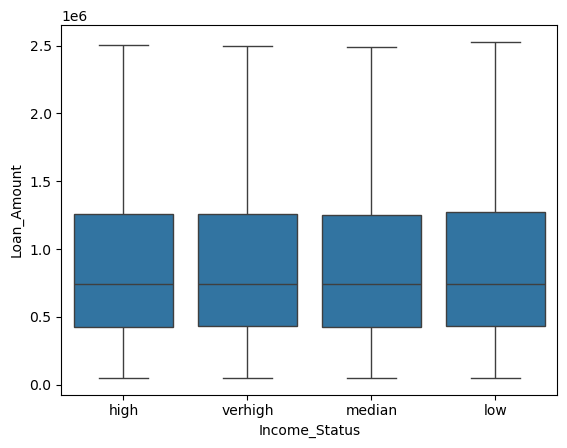

In [26]:
sns.boxplot(x='Income_Status', y='Loan_Amount', data=df, showfliers=False)

In [27]:
# 2.loan status vs credit score?

In [28]:
df.groupby('Loan_Status')['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
Active,"76,832.00",575.58,158.57,300.00,439.00,576.00,712.00,850.00
Closed,"76,949.00",575.63,159.41,300.00,438.00,576.00,715.00,850.00
Default,"76,703.00",574.21,158.78,300.00,437.00,574.00,712.00,850.00


<Axes: xlabel='Loan_Status', ylabel='Credit_Score'>

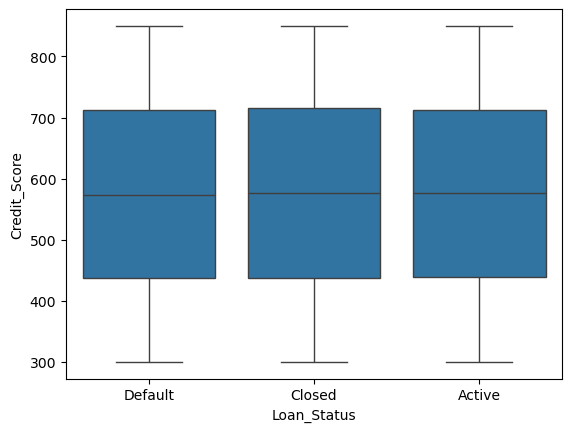

In [29]:
sns.boxplot(x=df['Loan_Status'],y=df['Credit_Score'])

In [ ]:
# 3.Age vs EMI_Amount

In [30]:
df['EMI_Amount'] = pd.to_numeric(df['EMI_Amount'], errors='coerce')

In [31]:
df.groupby('AgeGroup')['EMI_Amount'].describe()

C:\Users\there\AppData\Local\Temp\ipykernel_10060\942561390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['EMI_Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
18–25,"30,346.00","25,267.58","17,744.03","1,364.28","11,662.25","20,722.40","34,993.67","90,215.92"
26–35,"43,443.00","25,243.39","17,768.21","1,356.90","11,640.73","20,560.39","35,049.86","90,091.77"
36–45,"43,522.00","25,151.41","17,684.22","1,233.50","11,645.29","20,545.18","34,797.05","89,686.45"
46–55,"43,733.00","25,184.91","17,760.41","1,249.14","11,629.68","20,543.08","34,828.98","89,605.39"
56–65,"43,377.00","25,240.40","17,716.66","1,239.39","11,614.44","20,640.16","34,977.82","90,114.59"
65+,"26,063.00","25,190.14","17,805.75","1,285.80","11,582.44","20,381.77","35,244.62","89,938.62"


In [33]:
df.groupby('AgeGroup')['EMI_Amount_Capped'].describe()

C:\Users\there\AppData\Local\Temp\ipykernel_10060\1418601603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['EMI_Amount_Capped'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
18–25,"30,346.00","25,008.39","16,980.39","1,364.28","11,662.25","20,722.40","34,993.67","69,971.08"
26–35,"43,443.00","24,990.48","17,025.44","1,356.90","11,640.73","20,560.39","35,049.86","69,971.08"
36–45,"43,522.00","24,903.29","16,952.03","1,233.50","11,645.29","20,545.18","34,797.05","69,971.08"
46–55,"43,733.00","24,934.41","17,025.19","1,249.14","11,629.68","20,543.08","34,828.98","69,971.08"
56–65,"43,377.00","24,992.07","16,985.57","1,239.39","11,614.44","20,640.16","34,977.82","69,971.08"
65+,"26,063.00","24,940.31","17,075.22","1,285.80","11,582.44","20,381.77","35,244.62","69,971.08"


Lower limit: -23372.237500000003, Upper limit: 69971.0825


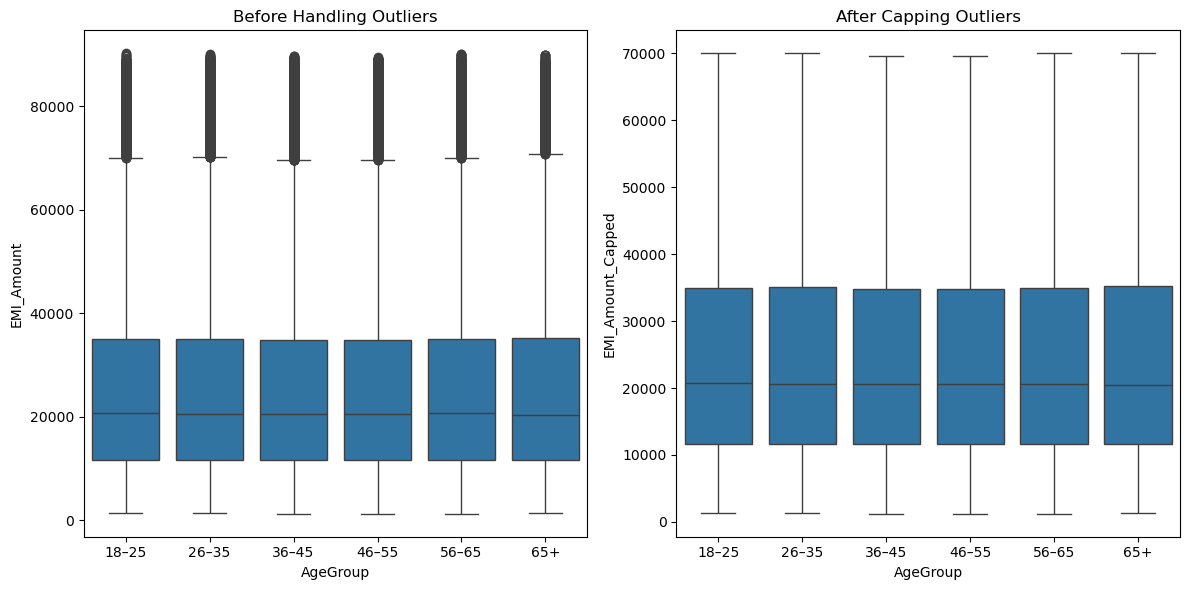

In [32]:
# Convert EMI_Amount to numeric (in case it's not)
df['EMI_Amount'] = pd.to_numeric(df['EMI_Amount'], errors='coerce')

# Step 1: Calculate IQR limits
Q1 = df['EMI_Amount'].quantile(0.25)
Q3 = df['EMI_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")

# Step 2: Cap/floor outliers instead of removing
df['EMI_Amount_Capped'] = np.where(df['EMI_Amount'] > upper_limit, upper_limit,
                            np.where(df['EMI_Amount'] < lower_limit, lower_limit, df['EMI_Amount']))

# Step 3: Plot boxplots (Before vs After)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='AgeGroup', y='EMI_Amount', data=df)
plt.title('Before Handling Outliers')

plt.subplot(1,2,2)
sns.boxplot(x='AgeGroup', y='EMI_Amount_Capped', data=df, showfliers=False)
plt.title('After Capping Outliers')

plt.tight_layout()
plt.show()

In [34]:
# 4.Gender vs Loan_Repayment_Status?

In [36]:
df['Gender'].value_counts()

Gender
Male      77146
Female    76744
Other     76594
Name: count, dtype: int64

In [39]:
df['Loan_Repayment_Status'].value_counts()

Loan_Repayment_Status
Completed    77227
Pending      76641
Deferred     76616
Name: count, dtype: int64

In [41]:
pd.crosstab(df['Gender'],df['Loan_Repayment_Status'])

Loan_Repayment_Status,Completed,Deferred,Pending
Gender,,,
Female,25640,25608,25496
Male,25943,25564,25639
Other,25644,25444,25506


<Axes: xlabel='Loan_Repayment_Status', ylabel='Gender'>

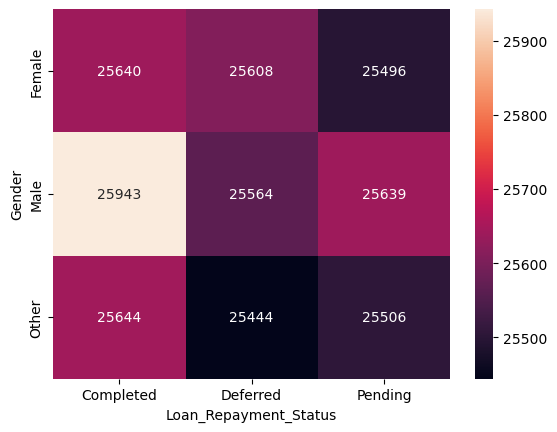

In [42]:
sns.heatmap(pd.crosstab(df['Gender'],df['Loan_Repayment_Status']),annot=True,fmt='.0f')

In [43]:
# 5.What is the relationship between Age and Credit Score?

In [51]:
df['Age'].min()

18

In [52]:
df['Age'].max()

70

In [53]:
df['AgeGroup'].value_counts()

AgeGroup
46–55    43733
36–45    43522
26–35    43443
56–65    43377
18–25    30346
65+      26063
Name: count, dtype: int64

In [54]:
df['Credit_Score'].describe()

count   230,484.00
mean        575.14
std         158.92
min         300.00
25%         438.00
50%         575.00
75%         713.00
max         850.00
Name: Credit_Score, dtype: float64

In [49]:
df.groupby('AgeGroup')['Credit_Score'].describe()

C:\Users\there\AppData\Local\Temp\ipykernel_10060\2911680738.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Credit_Score'].describe()


,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
18–25,"30,346.00",576.50,159.11,300.00,439.00,577.00,715.00,850.00
26–35,"43,443.00",574.20,158.71,300.00,438.00,574.00,712.00,850.00
36–45,"43,522.00",574.45,159.38,300.00,437.00,574.00,712.00,850.00
46–55,"43,733.00",575.08,158.76,300.00,437.00,576.00,712.00,850.00
56–65,"43,377.00",575.54,158.65,300.00,439.00,575.00,713.00,850.00
65+,"26,063.00",575.71,159.02,300.00,436.00,575.00,714.00,850.00


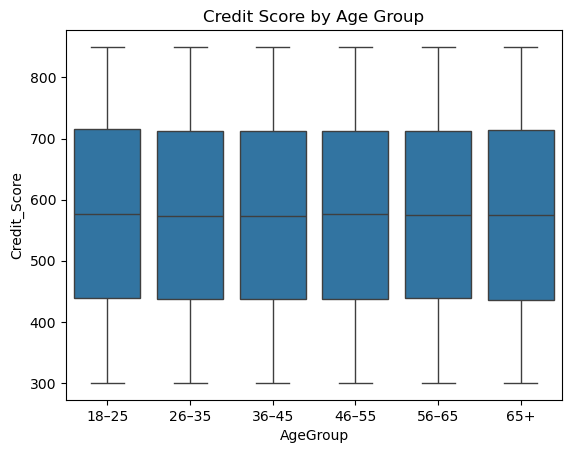

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='AgeGroup', y='Credit_Score', data=df, order=labels)
plt.title('Credit Score by Age Group')
plt.show()


In [81]:
# 6.Does Loan Status differ by Gender?

In [82]:
pd.crosstab(df['Gender'],df['Loan_Status'])

Loan_Status,Active,Closed,Default
Gender,,,
Female,25378,25668,25698
Male,25695,25816,25635
Other,25759,25465,25370


<Axes: xlabel='Loan_Status', ylabel='Gender'>

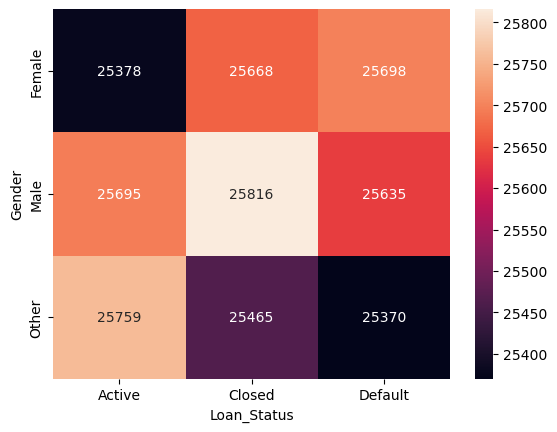

In [83]:
sns.heatmap(pd.crosstab(df['Gender'],df['Loan_Status']),annot=True,fmt='.0f')

In [55]:
# 7. gender vs annual income?

In [57]:
df['Annual_Income'].describe()

count     230,484.00
mean    1,348,861.08
std       664,284.38
min       200,004.00
25%       772,936.00
50%     1,346,870.50
75%     1,924,250.00
max     2,499,999.00
Name: Annual_Income, dtype: float64

In [58]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [59]:
df['Gender'] = df['Gender'].astype('category')

In [61]:
df.groupby('Gender')['Annual_Income'].describe()

C:\Users\there\AppData\Local\Temp\ipykernel_10060\2815229365.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Annual_Income'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,"76,744.00","1,352,774.36","662,678.65","200,014.00","777,333.75","1,356,744.50","1,923,939.75","2,499,909.00"
Male,"77,146.00","1,346,595.21","664,456.08","200,007.00","772,942.00","1,341,211.50","1,922,520.75","2,499,999.00"
Other,"76,594.00","1,347,222.35","665,708.02","200,004.00","767,901.00","1,342,353.00","1,926,051.50","2,499,979.00"


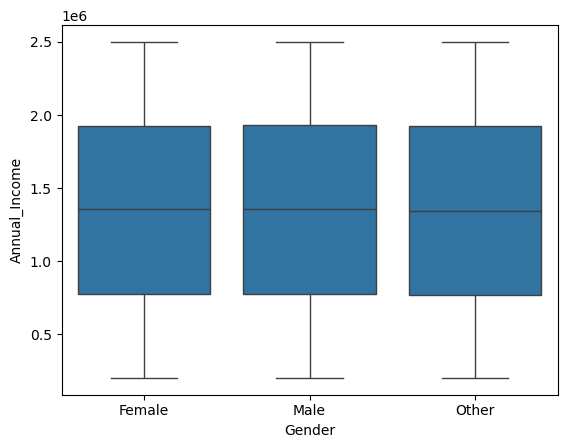

In [65]:
df_sample = df.sample(100000)
sns.boxplot(x='Gender', y='Annual_Income', data=df_sample)
plt.show()

In [66]:
# 8.How does Loan Type affect Loan Amount?

In [67]:
df['Loan_Amount'].describe()

count     230,484.00
mean    1,097,855.98
std     1,079,367.92
min        50,010.00
25%       429,510.00
50%       741,555.00
75%     1,259,158.75
max     4,999,960.00
Name: Loan_Amount, dtype: float64

In [69]:
df['Loan_Type'].value_counts()

Loan_Type
Car Loan          46364
Home Loan         46361
Education Loan    45988
Gold Loan         45984
Personal Loan     45787
Name: count, dtype: int64

In [77]:
df.groupby('Loan_Type')['Loan_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Type,,,,,,,,
Car Loan,"46,364.00","1,102,474.77","518,696.41","200,073.00","654,201.00","1,103,894.50","1,551,062.00","1,999,980.00"
Education Loan,"45,988.00","549,429.59","260,864.11","100,051.00","322,508.75","549,103.50","776,065.50","999,965.00"
Gold Loan,"45,984.00","550,795.00","259,070.25","100,004.00","326,130.00","549,476.50","773,874.75","999,959.00"
Home Loan,"46,361.00","2,744,030.87","1,299,016.06","500,082.00","1,621,700.00","2,740,991.00","3,865,853.00","4,999,960.00"
Personal Loan,"45,787.00","526,615.80","273,800.59","50,010.00","288,351.00","527,950.00","763,813.50","999,987.00"


<Axes: xlabel='Loan_Type', ylabel='Loan_Amount'>

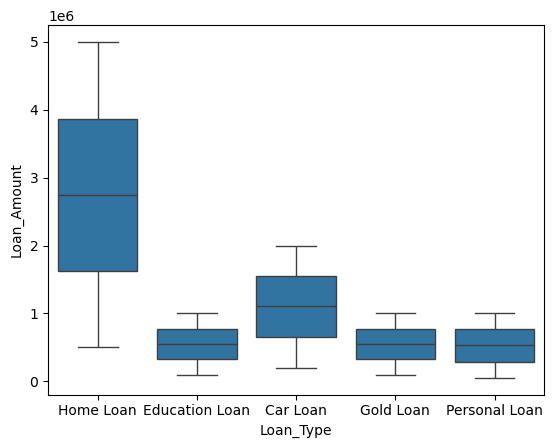

In [71]:
sns.boxplot(x=df['Loan_Type'],y=df['Loan_Amount'])

In [82]:
# 9.Is Loan Status dependent on Credit Score?

In [83]:
df.groupby('Loan_Status')['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
Active,"76,832.00",575.58,158.57,300.00,439.00,576.00,712.00,850.00
Closed,"76,949.00",575.63,159.41,300.00,438.00,576.00,715.00,850.00
Default,"76,703.00",574.21,158.78,300.00,437.00,574.00,712.00,850.00


<Axes: xlabel='Loan_Status', ylabel='Credit_Score'>

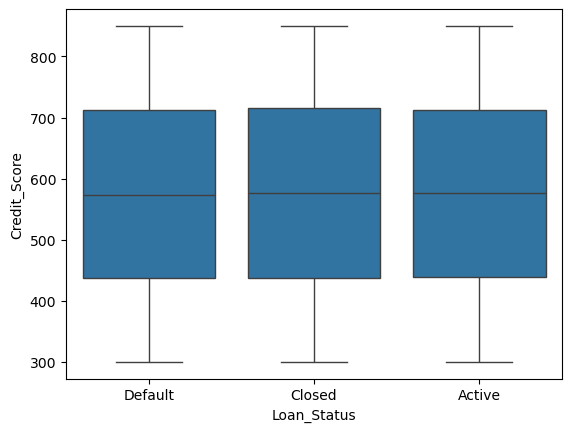

In [84]:
sns.boxplot(x='Loan_Status',y='Credit_Score',data=df)

In [85]:
# 10.Do different States show variation in Loan Approval Rate?

In [87]:
approved_status = ["Closed", "Active"]

# Calculate approval rate
approval_rate = (
    df.groupby(["State"])["Loan_Status"]
      .apply(lambda x: x.isin(approved_status).mean() * 100)
      .reset_index(name="Approval Rate (%)")
      .sort_values(by="Approval Rate (%)", ascending=False)
)

print(approval_rate.head(10))

            State  Approval Rate (%)
6   Uttar Pradesh              67.16
0  Andhra Pradesh              66.95
2       Karnataka              66.79
7     West Bengal              66.72
4       Rajasthan              66.65
5      Tamil Nadu              66.57
3     Maharashtra              66.54
1           Delhi              66.39


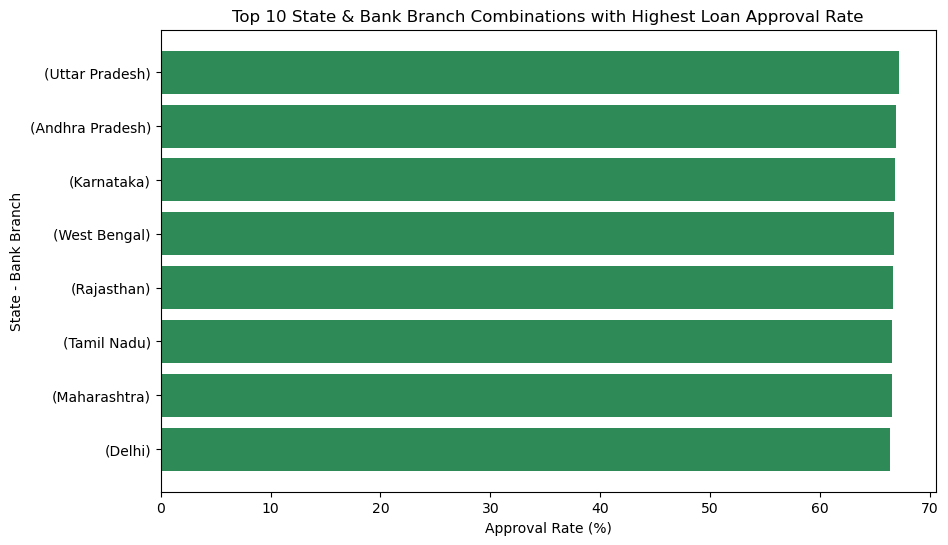

In [93]:
top10 = approval_rate.head(10)
plt.figure(figsize=(10,6))
plt.barh( "(" + top10["State"] + ")", top10["Approval Rate (%)"], color='seagreen')
plt.xlabel("Approval Rate (%)")
plt.ylabel("State - Bank Branch")
plt.title("Top 10 State & Bank Branch Combinations with Highest Loan Approval Rate")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 11.How does Interest Rate vary across different Loan Types?

In [99]:
df.groupby('Loan_Type')['Interest_Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Type,,,,,,,,
Car Loan,"46,364.00",11.48,2.02,8.00,9.73,11.47,13.21,15.00
Education Loan,"45,988.00",11.50,2.02,8.00,9.75,11.50,13.24,15.00
Gold Loan,"45,984.00",11.50,2.02,8.00,9.75,11.49,13.25,15.00
Home Loan,"46,361.00",11.50,2.01,8.00,9.76,11.49,13.24,15.00
Personal Loan,"45,787.00",11.49,2.03,8.00,9.73,11.50,13.25,15.00


<Axes: xlabel='Loan_Type', ylabel='Interest_Rate'>

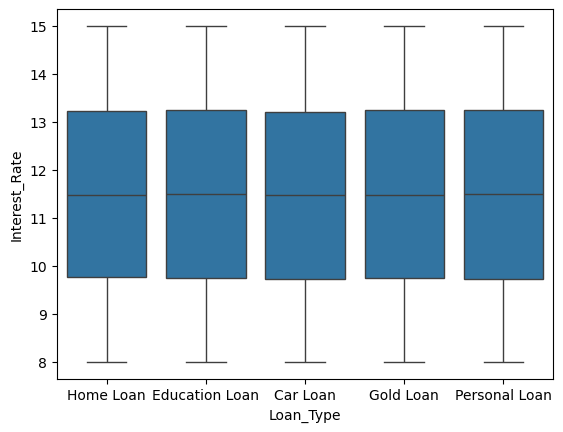

In [101]:
sns.boxplot(x='Loan_Type',y='Interest_Rate',data=df)

In [ ]:
#Income vs Loan_Amount

#Credit_Score vs Loan_Status

#Age vs EMI_Amount

#Gender vs Loan_Repayment_Status

#What is the relationship between Age and Credit Score?

#Does Loan Status differ by Gender?

#Which Gender group has the highest Average Annual Income?

#How does Loan Type affect Loan Amount?

#Is Loan Status dependent on Credit Score?

#Do different States show variation in Loan Approval Rate?

#How does Interest Rate vary across different Loan Types?

What is the relationship between Loan Amount and EMI Amount?

How does Loan Term affect Loan Amount?

Does Account Balance differ by Occupation?

Are males or females more likely to have higher Credit Scores
How does Loan Repayment Status vary with Loan Amount?

Is there a link between Annual Income and Loan Status?

Do different Bank Branches have different Loan Approval Rates?

Is Interest Rate influenced by Credit Score?

Does Age affect Loan Repayment Status?

What is the distribution of Loan Type across Cities?

How does Loan Term vary by Loan Type?

What is the relationship between Disbursed Amount and Loan Amount?

In [ ]:
How do Gender and Occupation together affect Loan Status?

Does Age and Annual Income together influence Loan Amount?

How do Credit Score and Interest Rate impact Loan Approval?

How do Loan Term, EMI Amount, and Loan Amount relate to each other?

How do Occupation and City influence the Type of Loan chosen?

How do Annual Income and Credit Score together affect Loan Repayment Status?

How do Age, Gender, and Loan Type impact Loan Status?

Which State and Bank Branch combinations have the best Loan Approval Rate?

How do Credit Score, Loan Amount, and Loan Status interact?

How does Interest Rate vary by Loan Type and Loan Term?

How do Age, Occupation, and Annual Income relate to Credit Score?

How do Loan Type, Loan Term, and Loan Amount affect EMI Amount?

Do high-income customers from specific occupations receive lower interest rates?

How does Loan Approval Date trend across Loan Type and State?

Which Branch Manager and Bank Branch pair has the highest Loan Repayment Rate?

How do Loan Amount, Interest Rate, and Disbursed Amount interact?

How do Age, Annual Income, and Credit Score together affect Loan Status?

Do Occupation, City, and Gender influence Loan Repayment Status?

How do Loan Term, Interest Rate, and Loan Type together determine EMI Amount?

Which combination of State, Loan Type, and Branch has the highest Loan Disbursement?